In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#coordinates

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [68]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | umm lajj
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 1 | nguruka
Processing Record 5 of Set 1 | sarangani
Processing Record 6 of Set 1 | yarada
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bagn
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | iturama
Processing Record 13 of Set 1 | buta
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | aktau
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | lolua
City not found. Skipping...


Processing Record 35 of Set 4 | namatanai
Processing Record 36 of Set 4 | vao
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | pringsewu
Processing Record 39 of Set 4 | moose factory
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | gorno-chuyskiy
City not found. Skipping...
Processing Record 42 of Set 4 | ugoofaaru
Processing Record 43 of Set 4 | codrington
Processing Record 44 of Set 4 | bargal
City not found. Skipping...
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | ko samui
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | berdyuzhye
City not found. Skipping...
Processing Record 1 of Set 5 | huilong
Processing Record 2 of Set 5 | fevralsk
City not found. Skipping...
Processing Record 3 of Set 5 | balkhash
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | denpasar
Processing Record 6 of Set 5 |

Processing Record 24 of Set 8 | tura
Processing Record 25 of Set 8 | batemans bay
Processing Record 26 of Set 8 | torres
Processing Record 27 of Set 8 | swan hill
Processing Record 28 of Set 8 | jieshi
Processing Record 29 of Set 8 | akyab
Processing Record 30 of Set 8 | zarubino
Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | shabo
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | bitlis
Processing Record 35 of Set 8 | alihe
Processing Record 36 of Set 8 | vostok
Processing Record 37 of Set 8 | road town
Processing Record 38 of Set 8 | tacuati
Processing Record 39 of Set 8 | borgo san dalmazzo
Processing Record 40 of Set 8 | phalodi
Processing Record 41 of Set 8 | garowe
Processing Record 42 of Set 8 | roald
Processing Record 43 of Set 8 | honningsvag
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | teguldet
Processing Record 46 of Set 8 | mabaruma
Processing Record 47 of Set 8 | ituni
City not found. Skipping

Processing Record 1 of Set 13 | coffs harbour
Processing Record 2 of Set 13 | wuwei
Processing Record 3 of Set 13 | karlskrona
Processing Record 4 of Set 13 | ozernovskiy
Processing Record 5 of Set 13 | placido de castro
Processing Record 6 of Set 13 | samalaeulu
City not found. Skipping...
Processing Record 7 of Set 13 | vila velha
Processing Record 8 of Set 13 | mackay
Processing Record 9 of Set 13 | mandalgovi
Processing Record 10 of Set 13 | asmar
Processing Record 11 of Set 13 | ribeira brava
Processing Record 12 of Set 13 | erdenet
Processing Record 13 of Set 13 | hukuntsi
Processing Record 14 of Set 13 | havoysund
Processing Record 15 of Set 13 | saint-augustin
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)




,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Lajj,SA,2021-12-02 00:55:08,25.0213,37.2685,74.16,66,6,9.71
1,Nguruka,TZ,2021-12-02 00:55:08,-5.1092,31.0419,63.77,92,74,2.19
2,Sarangani,PH,2021-12-02 00:55:08,5.4033,125.4636,83.61,75,76,10.87
3,Yarada,IN,2021-12-02 00:55:09,17.6500,83.2667,68.32,88,10,4.61
4,Salalah,OM,2021-12-02 00:55:09,17.0151,54.0924,72.07,46,0,6.11
5,Ushuaia,AR,2021-12-02 00:53:05,-54.8000,-68.3000,47.86,61,40,24.16
6,Bagn,NO,2021-12-02 00:55:09,60.8225,9.5521,20.73,83,84,5.32
7,Touros,BR,2021-12-02 00:55:10,-5.1989,-35.4608,81.50,74,37,10.96
8,Georgetown,MY,2021-12-02 00:52:39,5.4112,100.3354,78.89,88,20,1.99
9,Iturama,BR,2021-12-02 00:50:57,-19.7281,-50.1956,75.29,72,100,3.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1638407489.824404

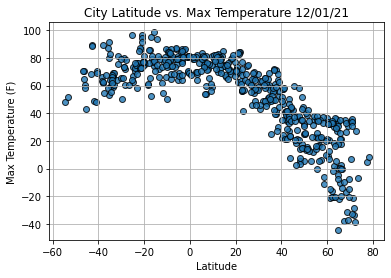

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

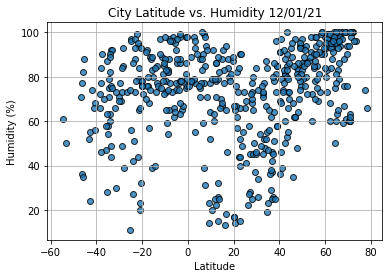

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

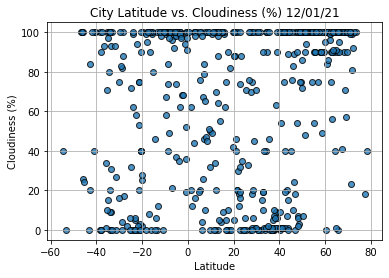

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

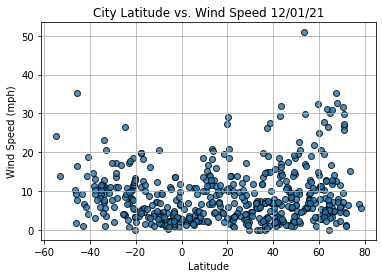

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]

In [22]:
index13

City               Saint-Philippe
Country                        RE
Date          2021-12-02 00:54:29
Lat                      -21.3585
Lng                       55.7679
Max Temp                    72.99
Humidity                       84
Cloudiness                     53
Wind Speed                   10.6
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
510     True
511     True
512    False
513     True
514     True
Name: Lat, Length: 515, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Umm Lajj,SA,2021-12-02 00:55:08,25.0213,37.2685,74.16,66,6,9.71
2,Sarangani,PH,2021-12-02 00:55:08,5.4033,125.4636,83.61,75,76,10.87
3,Yarada,IN,2021-12-02 00:55:09,17.6500,83.2667,68.32,88,10,4.61
4,Salalah,OM,2021-12-02 00:55:09,17.0151,54.0924,72.07,46,0,6.11
6,Bagn,NO,2021-12-02 00:55:09,60.8225,9.5521,20.73,83,84,5.32


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

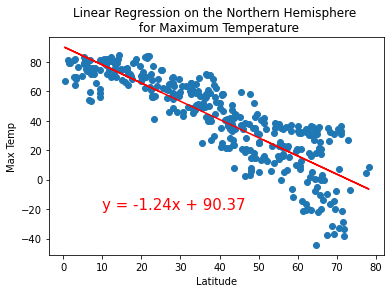

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

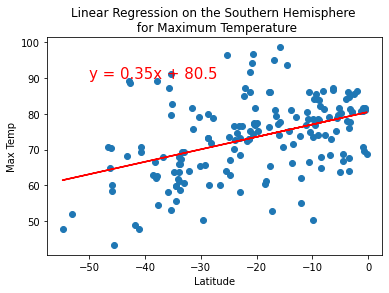

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

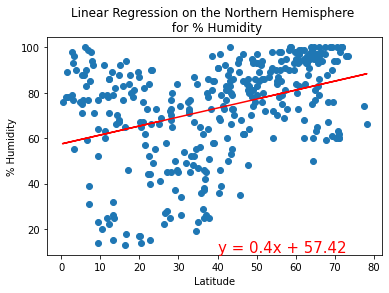

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

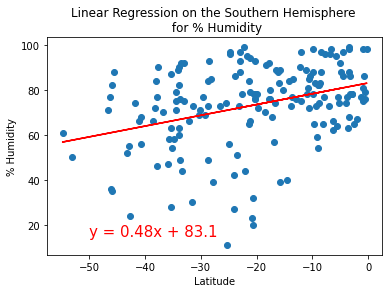

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

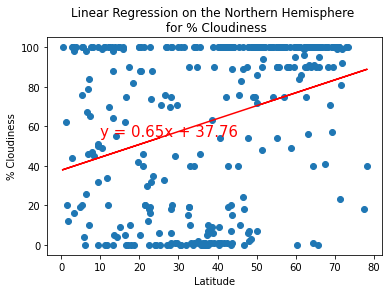

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

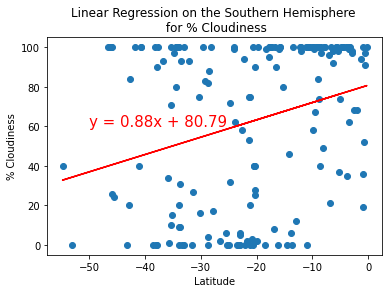

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

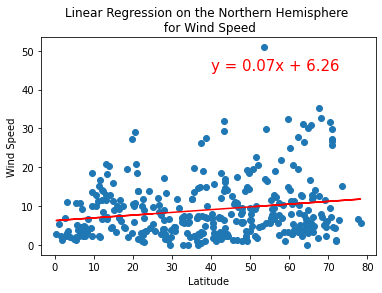

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,45))

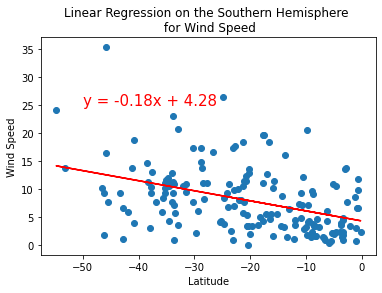

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))